In [65]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
import os
import statistics

cmap = plt.get_cmap('Set1')

Stats = ['simSeconds ',
'hostSeconds ',
'system.mem_ctrl.readReqs ',
'system.mem_ctrl.writeReqs ',
'system.mem_ctrl.servicedByWrQ ',
'system.mem_ctrl.mergedWrBursts ',
'system.mem_ctrl.numTotHits ',
'system.mem_ctrl.numTotMisses ',
'system.mem_ctrl.numColdMisses ',
'system.mem_ctrl.numHotMisses ',
'system.mem_ctrl.numRdMissClean ',
'system.mem_ctrl.numRdMissDirty ',
'system.mem_ctrl.numRdHit ',
'system.mem_ctrl.numWrMissClean ',
'system.mem_ctrl.numWrMissDirty ',
'system.mem_ctrl.numWrHit ',
'system.mem_ctrl.numRdHitDirty ',
'system.mem_ctrl.numRdHitClean ',
'system.mem_ctrl.numWrHitDirty ',
'system.mem_ctrl.numWrHitClean ',
'system.o3Cpu0.thread_0.numInsts ',
'system.o3Cpu1.thread_0.numInsts ',
'system.o3Cpu2.thread_0.numInsts ',
'system.o3Cpu3.thread_0.numInsts ',
'system.o3Cpu4.thread_0.numInsts ',
'system.o3Cpu5.thread_0.numInsts ',
'system.o3Cpu6.thread_0.numInsts ',
'system.o3Cpu7.thread_0.numInsts ',
'system.mem_ctrl.avgRdBWSys ',
'system.mem_ctrl.avgWrBWSys ',
'system.mem_ctrl.avgORBLen ',
'system.far_mem_ctrl.avgRdBWSys ',
'system.far_mem_ctrl.avgWrBWSys ',
'system.loc_mem_ctrl.avgRdBWSys ',
'system.loc_mem_ctrl.avgWrBWSys ',
'system.loc_mem_ctrl.dram.readBursts ',
'system.loc_mem_ctrl.dram.writeBursts ',
'system.loc_mem_ctrl.dram_2.readBursts ',
'system.loc_mem_ctrl.dram_2.writeBursts ',
'system.far_mem_ctrl.dram.readBursts ',
'system.far_mem_ctrl.dram.writeBursts ',
'system.loc_mem_ctrl.dram.avgRdBW ',
'system.loc_mem_ctrl.dram.avgWrBW ',
'system.loc_mem_ctrl.dram_2.avgRdBW ',
'system.loc_mem_ctrl.dram_2.avgWrBW ',
'system.far_mem_ctrl.dram.avgRdBW ',
'system.far_mem_ctrl.dram.avgWrBW ',
'system.loc_mem_ctrl.dram.busUtil ',
'system.loc_mem_ctrl.dram.busUtilRead ',
'system.loc_mem_ctrl.dram.busUtilWrite ',
'system.loc_mem_ctrl.dram_2.busUtil ',
'system.loc_mem_ctrl.dram_2.busUtilRead ',
'system.loc_mem_ctrl.dram_2.busUtilWrite ',
'system.far_mem_ctrl.dram.busUtil ',
'system.far_mem_ctrl.dram.busUtilRead ',
'system.far_mem_ctrl.dram.busUtilWrite ',
'system.far_mem_ctrl.dram.bytesRead  ',
'system.far_mem_ctrl.dram.bytesWritten  ',
'system.loc_mem_ctrl.dram.bytesRead  ',
'system.loc_mem_ctrl.dram.bytesWritten  ',
'system.loc_mem_ctrl.dram_2.bytesRead  ',
'system.loc_mem_ctrl.dram_2.bytesWritten  ',
'system.mem_ctrl.avgTimeTagCheckRes ',
'system.mem_ctrl.avgTimeTagCheckResRd ',
'system.mem_ctrl.avgTimeTagCheckResWr ',
'system.mem_ctrl.avgPktRespTimeRd ',
'system.mem_ctrl.avgPktRespTimeWr ',
'system.mem_ctrl.avgPktORBTime ',
'system.mem_ctrl.avgPktORBTimeRd ',
'system.mem_ctrl.avgPktORBTimeWr ',
'system.mem_ctrl.avgTimeInLocRead ',
'system.mem_ctrl.avgTimeInLocWrite ',
'system.mem_ctrl.avgTimeInFarRead ',
'system.mem_ctrl.missRatio '
          ]

dfCols = [
         'app',
         'simSeconds',
         'hostSeconds',
         'readReqs',
         'writeReqs',
         'servicedByWrQ',
         'mergedWrBursts',
         'numTotHits',
         'numTotMisses',
         'numColdMisses',
         'numHotMisses',
         'numRdMissClean',
         'numRdMissDirty',
         'numRdHit',
         'numWrMissClean',
         'numWrMissDirty',
         'numWrHit',
         'numRdHitDirty',
         'numRdHitClean',
         'numWrHitDirty',
         'numWrHitClean',
         'numInsts0',
         'numInsts1',
         'numInsts2',
         'numInsts3',
         'numInsts4',
         'numInsts5',
         'numInsts6',
         'numInsts7',
         'avgRdBWSys',
         'avgWrBWSys',
         'avgORBLen',
         'farAvgRdBWSys',
         'farAvgWrBWSys',
         'locAvgRdBWSys',
         'locAvgWrBWSys',
         'readBursts1',
         'writeBursts1',
         'readBursts2',
         'writeBursts2',
         'readBursts3',
         'writeBursts3',
         'loc1AvgRdBW',
         'loc1AvgWrBW',
         'loc2AvgRdBW',
         'loc2AvgWrBW',
         'farAvgRdBW',
         'farAvgWrBW',
         'loc1BusUtil',
         'loc1BusUtilRead',
         'loc1BusUtilWrite',
         'loc2BusUtil',
         'loc2BusUtilRead',
         'loc2BusUtilWrite',
         'farBusUtil',
         'farBusUtilRead',
         'farBusUtilWrite',
         'farBytesRead',
         'farBytesWritten',
         'loc1BytesRead',
         'loc1BytesWritten',
         'loc2BytesRead',
         'loc2BytesWritten',
         'avgTimeTagCheckRes',
         'avgTimeTagCheckResRd',
         'avgTimeTagCheckResWr',
         'avgPktRespTimeRd',
         'avgPktRespTimeWr',
         'avgPktORBTime',
         'avgPktORBTimeRd',
         'avgPktORBTimeWr',
         'avgTimeInLocRead',
         'avgTimeInLocWrite',
         'avgTimeInFarRead',
         'missRatio'

         ]
##########################################################

def getStat(filename, stat, index):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        x = 0
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l and x < (index-1):
                    x = x+1
                elif stat in l and x == (index-1):
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0

##########################################################

def creatDataFrame(dataDir, suite, index):
    app = []
    if suite == "GAPBS":
        app = ['bc', 'bfs', 'cc', 'pr', 'sssp', 'tc']
    if suite == "NPB":
        app = ['bt', 'cg', 'ft', 'is', 'lu', 'mg', 'sp', 'ua']
    rows = []
    i = 0
    for a in app:
        stats = [a]
        for stat in Stats:
            time_file_path = '{}/{}/stats.txt'.format(dataDir, a)
            ret_line = getStat(time_file_path, stat, index[i])

            if ret_line != 0:
                #if ret_line=='nan' :
                #    stat_val = 0
                #else:
                stat_val = ret_line.split()[1]
            else:
                stat_val = 0
            stats.append(stat_val)

        rows.append(stats)
        i = i+1
    df = pd.DataFrame(rows, columns= dfCols)
    df['totNumInsts'] = df['numInsts0'].astype(int)+df['numInsts1'].astype(int)+df['numInsts2'].astype(int)+df['numInsts3'].astype(int)+df['numInsts4'].astype(int)+df['numInsts5'].astype(int)+df['numInsts6'].astype(int)+df['numInsts7'].astype(int)
    df['totBW'] = (df['avgRdBWSys'].astype(float)+df['avgWrBWSys'].astype(float))/1000000000
    df['coldRate'] = (df['numColdMisses'].astype(float) / (df['numTotMisses'].astype(float)+df['numTotHits'].astype(float))) *100
    df['injRate'] = (df['readReqs'].astype(float) + df['writeReqs'].astype(float))*64/1000000000 / df['simSeconds'].astype(float)
    df['BIPS'] = (df['totNumInsts'].astype(float)/1000000000)/df['simSeconds'].astype(float)
    
    df['accAmp'] =  (df['farBytesRead'].astype(float) + df['farBytesWritten'].astype(float) +
                     df['loc1BytesRead'].astype(float) + df['loc1BytesWritten'].astype(float) + 
                     df['loc2BytesRead'].astype(float) + df['loc2BytesWritten'].astype(float)) / (df['readReqs'].astype(float) * 64 + df['writeReqs'].astype(float) * 64)
    
    df['BWBloat'] =  (df['loc1AvgRdBW'].astype(float) + df['loc1AvgWrBW'].astype(float) +
                      df['loc2AvgRdBW'].astype(float) + df['loc2AvgWrBW'].astype(float) +
                      df['farAvgRdBW'].astype(float) + df['farAvgWrBW'].astype(float)) / ((df['avgRdBWSys'].astype(float) + df['avgWrBWSys'].astype(float)) / 1000000)
    return df

In [66]:
df_gap22_cas = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/cascade/1GB_8GB_g22_nC/GAPBS", "GAPBS", [1,1,1,1,1,1])
df_npbC_cas = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/cascade/1GB_8GB_g22_nC/NPB", "NPB",[1,1,1,1,1,1,1,1])

df_gap25_cas = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/cascade/1GB_85GB_g25_nD/GAPBS", "GAPBS", [1,1,1,1,1,1])
df_npbD_cas = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/cascade/1GB_85GB_g25_nD/NPB", "NPB",[1,1,1,1,1,1,1,1])

df_gap22_ram = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/rambus/1GB_8GB_g22_nC/GAPBS", "GAPBS", [1,1,1,1,1,1])
df_npbC_ram = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/rambus/1GB_8GB_g22_nC/NPB", "NPB",[1,1,1,1,1,1,1,1])

df_gap25_ram = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/rambus/1GB_85GB_g25_nD/GAPBS", "GAPBS", [1,1,1,1,1,1])
df_npbD_ram = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/rambus/1GB_85GB_g25_nD/NPB", "NPB",[1,1,1,1,1,1,1,1])


df_gap22_orc = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/oracle/1GB_8GB_g22_nC/GAPBS", "GAPBS", [1,1,1,1,1,1])
df_npbC_orc = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/oracle/1GB_8GB_g22_nC/NPB", "NPB",[1,1,1,1,1,1,1,1])

df_gap25_orc = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/oracle/1GB_85GB_g25_nD/GAPBS", "GAPBS", [1,1,1,1,1,1])
df_npbD_orc = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/oracle/1GB_85GB_g25_nD/NPB", "NPB",[1,1,1,1,1,1,1,1])

df_gap22_noDC = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/noDC/1GB_8GB_g22_nC/GAPBS", "GAPBS", [1,1,1,1,1,1])
df_npbC_noDC = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/noDC/1GB_8GB_g22_nC/NPB", "NPB",[1,1,1,1,1,1,1,1])

df_gap25_noDC = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/noDC/1GB_85GB_g25_nD/GAPBS", "GAPBS", [1,1,1,1,1,1])
df_npbD_noDC = creatDataFrame("/home/babaie/projects/rambusDesign/1gigDRAMCache/dramCacheController/newResults/baseline/noDC/1GB_85GB_g25_nD/NPB", "NPB",[1,1,1,1,1,1,1,1])


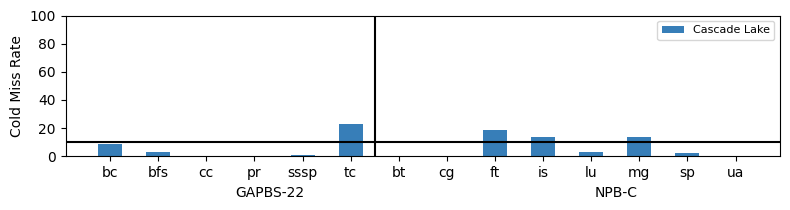

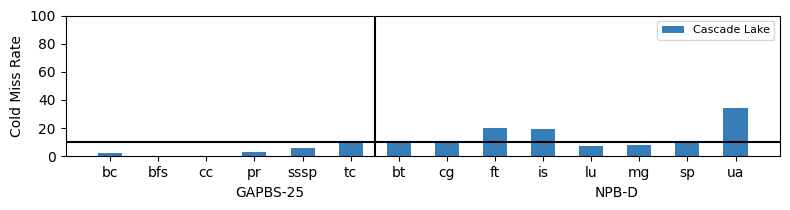

In [93]:
app_gap = df_gap22_cas['app']
gap_22_cas = df_gap22_cas['coldRate'].astype(float)

gap_25_cas = df_gap25_cas['coldRate'].astype(float)

app_npb = df_npbC_cas['app']
npb_C_cas = df_npbC_cas['coldRate'].astype(float)

npb_D_cas = df_npbD_cas['coldRate'].astype(float)

# Multi bar Chart1
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,100])

for i,app in enumerate(app_gap):
    plt.bar(i*2,   gap_22_cas[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)

offset = i*2+1
for i,app in enumerate(app_npb):
    plt.bar(offset+i*2+1,   npb_C_cas[i],     width=1, color=cmap(1))

plt.figtext(0.3, -0.01, "GAPBS-22")
plt.figtext(0.75, -0.01, "NPB-C")

plt.xticks(np.arange(14)*2, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
plt.axhline(y=10, color='black')

plt.ylabel("Cold Miss Rate")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

# Multi bar Chart2
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,100])

for i,app in enumerate(app_gap):
    plt.bar(i*2,   gap_25_cas[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)

offset = i*2+1
for i,app in enumerate(app_npb):
    plt.bar(offset+i*2+1,   npb_D_cas[i],     width=1, color=cmap(1))

plt.figtext(0.3, -0.01, "GAPBS-25")
plt.figtext(0.75, -0.01, "NPB-D")

plt.xticks(np.arange(14)*2, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
plt.axhline(y=10, color='black')

plt.ylabel("Cold Miss Rate")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

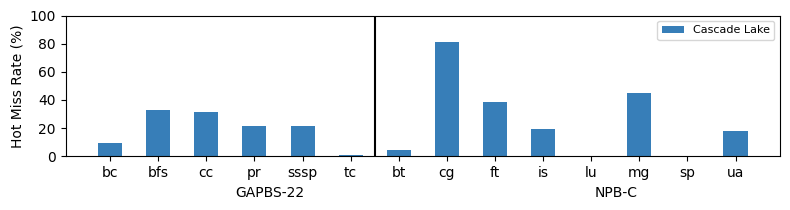

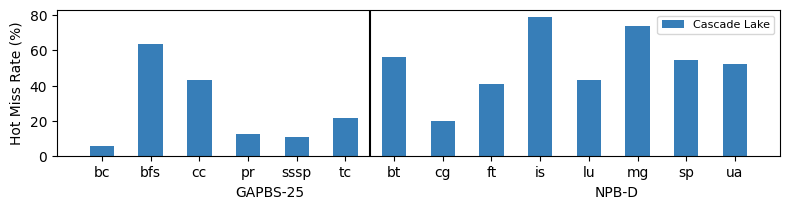

In [90]:
app_gap = df_gap22_cas['app']
gap_22_cas = df_gap22_cas['missRatio'].astype(float)-df_gap22_cas['coldRate'].astype(float)

gap_25_cas = df_gap25_cas['missRatio'].astype(float)-df_gap25_cas['coldRate'].astype(float)

app_npb = df_npbC_cas['app']
npb_C_cas = df_npbC_cas['missRatio'].astype(float)-df_npbC_cas['coldRate'].astype(float)

npb_D_cas = df_npbD_cas['missRatio'].astype(float)-df_npbD_cas['coldRate'].astype(float)

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,100])
for i,app in enumerate(app_gap):
    plt.bar(i*2,   gap_22_cas[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)

offset = i*2+1
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*2+1,   npb_C_cas[i],     width=1, color=cmap(1))

plt.figtext(0.3, -0.01, "GAPBS-22")
plt.figtext(0.75, -0.01, "NPB-C")

plt.xticks(np.arange(14)*2, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')

plt.ylabel("Hot Miss Rate (%)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
#plt.ylim([0,55])
for i,app in enumerate(app_gap):
    plt.bar(i*2,   gap_25_cas[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)

offset = i*2+1
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*2+1,   npb_D_cas[i],     width=1, color=cmap(1))

plt.figtext(0.3, -0.01, "GAPBS-25")
plt.figtext(0.75, -0.01, "NPB-D")

plt.xticks(np.arange(14)*2, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')

plt.ylabel("Hot Miss Rate (%)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

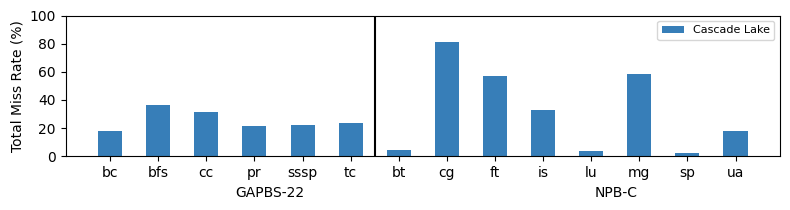

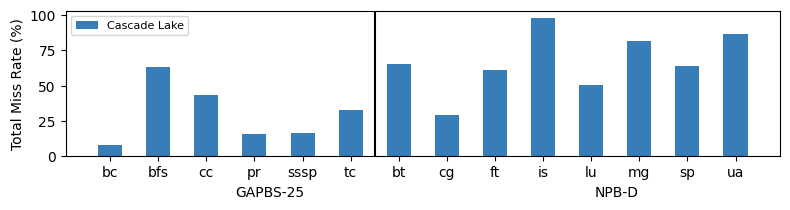

In [91]:
app_gap = df_gap22_cas['app']
gap_22_cas = df_gap22_cas['missRatio'].astype(float)

gap_25_cas = df_gap25_cas['missRatio'].astype(float)

app_npb = df_npbC_cas['app']
npb_C_cas = df_npbC_cas['missRatio'].astype(float)

npb_D_cas = df_npbD_cas['missRatio'].astype(float)

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,100])
for i,app in enumerate(app_gap):
    plt.bar(i*2,   gap_22_cas[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)

offset = i*2+1
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*2+1,   npb_C_cas[i],     width=1, color=cmap(1))

plt.figtext(0.3, -0.01, "GAPBS-22")
plt.figtext(0.75, -0.01, "NPB-C")

plt.xticks(np.arange(14)*2, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')

plt.ylabel("Total Miss Rate (%)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
#plt.ylim([0,55])
for i,app in enumerate(app_gap):
    plt.bar(i*2,   gap_25_cas[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)

offset = i*2+1
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*2+1,   npb_D_cas[i],     width=1, color=cmap(1))

plt.figtext(0.3, -0.01, "GAPBS-25")
plt.figtext(0.75, -0.01, "NPB-D")

plt.xticks(np.arange(14)*2, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')

plt.ylabel("Total Miss Rate (%)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

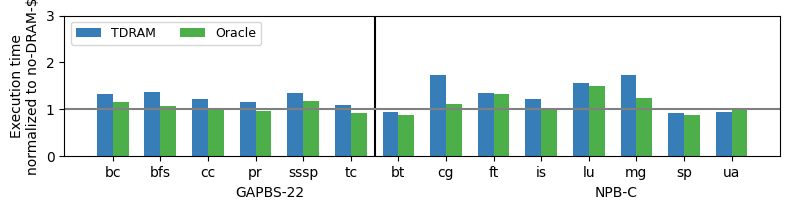

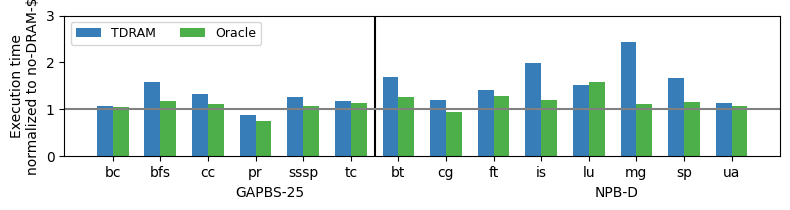

In [70]:
app_gap = df_gap22_ram['app']
gap_22_ram = df_gap22_ram['simSeconds'].astype(float)*1000
gap_22_orc = df_gap22_orc['simSeconds'].astype(float)*1000
gap_22_noDC = df_gap22_noDC['simSeconds'].astype(float)*1000


gap_25_ram = df_gap25_ram['simSeconds'].astype(float)*1000
gap_25_orc = df_gap25_orc['simSeconds'].astype(float)*1000
gap_25_noDC = df_gap25_noDC['simSeconds'].astype(float)*1000


app_npb = df_npbC_ram['app']
npb_C_ram = df_npbC_ram['simSeconds'].astype(float)*1000
npb_C_orc = df_npbC_orc['simSeconds'].astype(float)*1000
npb_C_noDC = df_npbC_noDC['simSeconds'].astype(float)*1000

npb_D_ram = df_npbD_ram['simSeconds'].astype(float)*1000
npb_D_orc = df_npbD_orc['simSeconds'].astype(float)*1000
npb_D_noDC = df_npbD_noDC['simSeconds'].astype(float)*1000


# Multi bar Chart1
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,3])

for i,app in enumerate(app_gap):
    plt.bar(i*3,   gap_22_ram[i]/gap_22_noDC[i],   width=1, color=cmap(1), label='TDRAM' if i==0 else None)
    plt.bar(i*3+1, gap_22_orc[i]/gap_22_noDC[i],   width=1, color=cmap(2), label='Oracle' if i==0 else None)

offset = i*3+2
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*3+1,   npb_C_ram[i]/npb_C_noDC[i],     width=1, color=cmap(1))
    plt.bar(offset+i*3+2,   npb_C_orc[i]/npb_C_noDC[i],   width=1, color=cmap(2))

plt.figtext(0.3, -0.01, "GAPBS-22")
plt.figtext(0.75, -0.01, "NPB-C")

plt.xticks(np.arange(14)*3+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
plt.axhline(y=1, color='grey')

plt.ylabel("Execution time\nnormalized to no-DRAM-$")
plt.legend(fontsize=9, ncol=2, loc='upper left')
plt.tight_layout()

# Multi bar Chart2
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,3])

for i,app in enumerate(app_gap):
    plt.bar(i*3,   gap_25_ram[i]/gap_25_noDC[i],   width=1, color=cmap(1), label='TDRAM' if i==0 else None)
    plt.bar(i*3+1, gap_25_orc[i]/gap_25_noDC[i],   width=1, color=cmap(2), label='Oracle' if i==0 else None)

offset = i*3+2
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*3+1,   npb_D_ram[i]/npb_D_noDC[i],     width=1, color=cmap(1))
    plt.bar(offset+i*3+2,   npb_D_orc[i]/npb_D_noDC[i],   width=1, color=cmap(2))

plt.figtext(0.3, -0.01, "GAPBS-25")
plt.figtext(0.75, -0.01, "NPB-D")

plt.xticks(np.arange(14)*3+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
plt.axhline(y=1, color='grey')

plt.ylabel("Execution time\nnormalized to no-DRAM-$")
plt.legend(fontsize=9, ncol=2)
plt.tight_layout()

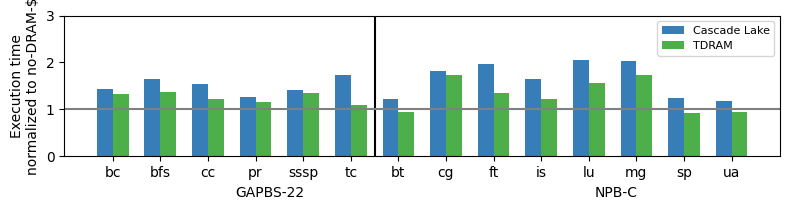

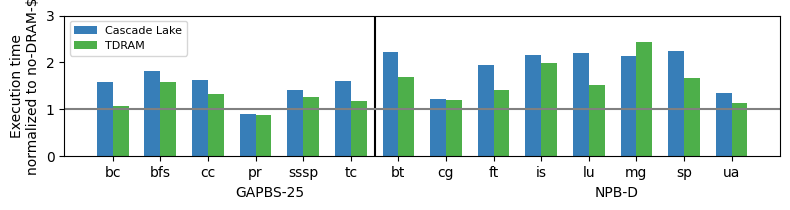

In [71]:
app_gap = df_gap22_cas['app']
gap_22_cas = df_gap22_cas['simSeconds'].astype(float)*1000
gap_22_ram = df_gap22_ram['simSeconds'].astype(float)*1000
gap_22_noDC = df_gap22_noDC['simSeconds'].astype(float)*1000


gap_25_cas = df_gap25_cas['simSeconds'].astype(float)*1000
gap_25_ram = df_gap25_ram['simSeconds'].astype(float)*1000
gap_25_noDC = df_gap25_noDC['simSeconds'].astype(float)*1000


app_npb = df_npbC_cas['app']
npb_C_cas = df_npbC_cas['simSeconds'].astype(float)*1000
npb_C_ram = df_npbC_ram['simSeconds'].astype(float)*1000
npb_C_noDC = df_npbC_noDC['simSeconds'].astype(float)*1000

npb_D_cas = df_npbD_cas['simSeconds'].astype(float)*1000
npb_D_ram = df_npbD_ram['simSeconds'].astype(float)*1000
npb_D_noDC = df_npbD_noDC['simSeconds'].astype(float)*1000


# Multi bar Chart1
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,3])

for i,app in enumerate(app_gap):
    plt.bar(i*3,   gap_22_cas[i]/gap_22_noDC[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)
    plt.bar(i*3+1, gap_22_ram[i]/gap_22_noDC[i],   width=1, color=cmap(2), label='TDRAM' if i==0 else None)

offset = i*3+2
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*3+1,   npb_C_cas[i]/npb_C_noDC[i],     width=1, color=cmap(1))
    plt.bar(offset+i*3+2,   npb_C_ram[i]/npb_C_noDC[i],   width=1, color=cmap(2))

plt.figtext(0.3, -0.01, "GAPBS-22")
plt.figtext(0.75, -0.01, "NPB-C")

plt.xticks(np.arange(14)*3+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
plt.axhline(y=1, color='grey')

plt.ylabel("Execution time\nnormalized to no-DRAM-$")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

# Multi bar Chart2
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,3])

for i,app in enumerate(app_gap):
    plt.bar(i*3,   gap_25_cas[i]/gap_25_noDC[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)
    plt.bar(i*3+1, gap_25_ram[i]/gap_25_noDC[i],   width=1, color=cmap(2), label='TDRAM' if i==0 else None)

offset = i*3+2
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*3+1,   npb_D_cas[i]/npb_D_noDC[i],     width=1, color=cmap(1))
    plt.bar(offset+i*3+2,   npb_D_ram[i]/npb_D_noDC[i],   width=1, color=cmap(2))

plt.figtext(0.3, -0.01, "GAPBS-25")
plt.figtext(0.75, -0.01, "NPB-D")

plt.xticks(np.arange(14)*3+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
plt.axhline(y=1, color='grey')

plt.ylabel("Execution time\nnormalized to no-DRAM-$")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

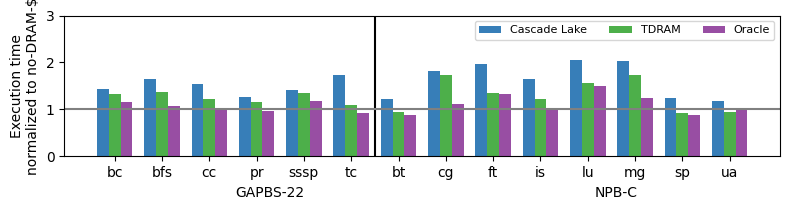

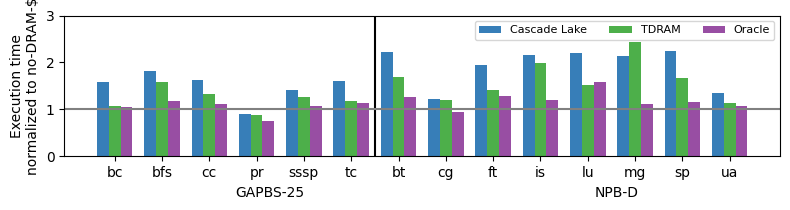

In [72]:
app_gap = df_gap22_cas['app']
gap_22_cas = df_gap22_cas['simSeconds'].astype(float)*1000
gap_22_ram = df_gap22_ram['simSeconds'].astype(float)*1000
gap_22_orc = df_gap22_orc['simSeconds'].astype(float)*1000
gap_22_noDC = df_gap22_noDC['simSeconds'].astype(float)*1000


gap_25_cas = df_gap25_cas['simSeconds'].astype(float)*1000
gap_25_ram = df_gap25_ram['simSeconds'].astype(float)*1000
gap_25_orc = df_gap25_orc['simSeconds'].astype(float)*1000
gap_25_noDC = df_gap25_noDC['simSeconds'].astype(float)*1000


app_npb = df_npbC_cas['app']
npb_C_cas = df_npbC_cas['simSeconds'].astype(float)*1000
npb_C_ram = df_npbC_ram['simSeconds'].astype(float)*1000
npb_C_orc = df_npbC_orc['simSeconds'].astype(float)*1000
npb_C_noDC = df_npbC_noDC['simSeconds'].astype(float)*1000

npb_D_cas = df_npbD_cas['simSeconds'].astype(float)*1000
npb_D_ram = df_npbD_ram['simSeconds'].astype(float)*1000
npb_D_orc = df_npbD_orc['simSeconds'].astype(float)*1000
npb_D_noDC = df_npbD_noDC['simSeconds'].astype(float)*1000


# Multi bar Chart1
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,3])

for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_22_cas[i]/gap_22_noDC[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)
    plt.bar(i*4+1, gap_22_ram[i]/gap_22_noDC[i],   width=1, color=cmap(2), label='TDRAM' if i==0 else None)
    plt.bar(i*4+2, gap_22_orc[i]/gap_22_noDC[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*4+3
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_C_cas[i]/npb_C_noDC[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_C_ram[i]/npb_C_noDC[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_C_orc[i]/npb_C_noDC[i],   width=1, color=cmap(3))

plt.figtext(0.3, -0.01, "GAPBS-22")
plt.figtext(0.75, -0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
plt.axhline(y=1, color='grey')

plt.ylabel("Execution time\nnormalized to no-DRAM-$")
plt.legend(fontsize=8, ncol=3)
plt.tight_layout()

# Multi bar Chart2
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,3])

for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_25_cas[i]/gap_25_noDC[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)
    plt.bar(i*4+1, gap_25_ram[i]/gap_25_noDC[i],   width=1, color=cmap(2), label='TDRAM' if i==0 else None)
    plt.bar(i*4+2, gap_25_orc[i]/gap_25_noDC[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*4+3
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_D_cas[i]/npb_D_noDC[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_D_ram[i]/npb_D_noDC[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_D_orc[i]/npb_D_noDC[i],   width=1, color=cmap(3))

plt.figtext(0.3, -0.01, "GAPBS-25")
plt.figtext(0.75, -0.01, "NPB-D")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
plt.axhline(y=1, color='grey')

plt.ylabel("Execution time\nnormalized to no-DRAM-$")
plt.legend(fontsize=8, ncol=3)
plt.tight_layout()

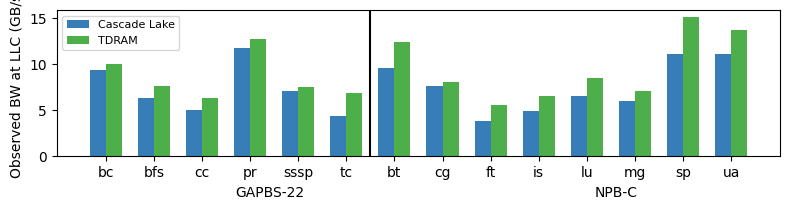

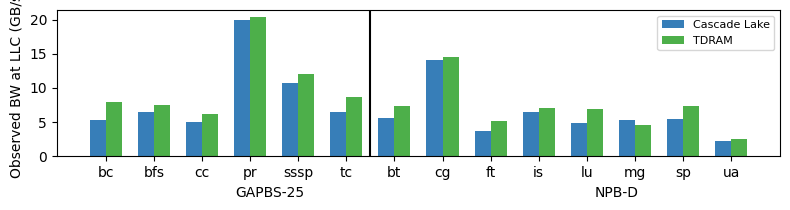

In [73]:
app_gap = df_gap22_cas['app']
gap_22_cas = df_gap22_cas['totBW'].astype(float)
gap_22_ram = df_gap22_ram['totBW'].astype(float)
gap_22_noDC = (df_gap22_noDC['farAvgRdBWSys'].astype(float)+df_gap22_noDC['farAvgWrBWSys'].astype(float))/1000000000


gap_25_cas = df_gap25_cas['totBW'].astype(float)
gap_25_ram = df_gap25_ram['totBW'].astype(float)
gap_25_noDC = (df_gap25_noDC['farAvgRdBWSys'].astype(float)+df_gap25_noDC['farAvgWrBWSys'].astype(float))/1000000000

app_npb = df_npbC_cas['app']
npb_C_cas = df_npbC_cas['totBW'].astype(float)
npb_C_ram = df_npbC_ram['totBW'].astype(float)
npb_C_noDC = (df_npbC_noDC['farAvgRdBWSys'].astype(float)+df_npbC_noDC['farAvgWrBWSys'].astype(float))/1000000000

npb_D_cas = df_npbD_cas['totBW'].astype(float)
npb_D_ram = df_npbD_ram['totBW'].astype(float)
npb_D_noDC = (df_npbD_noDC['farAvgRdBWSys'].astype(float)+df_npbD_noDC['farAvgWrBWSys'].astype(float))/1000000000


# Multi bar Chart1
fig = plt.figure()
fig.set_size_inches(8,2)
#plt.ylim([0,2.5])

for i,app in enumerate(app_gap):
    plt.bar(i*3,   gap_22_cas[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)
    plt.bar(i*3+1, gap_22_ram[i],   width=1, color=cmap(2), label='TDRAM' if i==0 else None)

offset = i*3+2
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*3+1,   npb_C_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*3+2,   npb_C_ram[i],   width=1, color=cmap(2))

plt.figtext(0.3, -0.01, "GAPBS-22")
plt.figtext(0.75, -0.01, "NPB-C")

plt.xticks(np.arange(14)*3+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
#plt.axhline(y=1, color='grey')

plt.ylabel("Observed BW at LLC (GB/s)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

# Multi bar Chart2
fig = plt.figure()
fig.set_size_inches(8,2)
#plt.ylim([0,2.5])

for i,app in enumerate(app_gap):
    plt.bar(i*3,   gap_25_cas[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)
    plt.bar(i*3+1, gap_25_ram[i],   width=1, color=cmap(2), label='TDRAM' if i==0 else None)

offset = i*3+2
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*3+1,   npb_D_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*3+2,   npb_D_ram[i],   width=1, color=cmap(2))

plt.figtext(0.3, -0.01, "GAPBS-25")
plt.figtext(0.75, -0.01, "NPB-D")

plt.xticks(np.arange(14)*3+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
#plt.axhline(y=1, color='grey')

plt.ylabel("Observed BW at LLC (GB/s)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

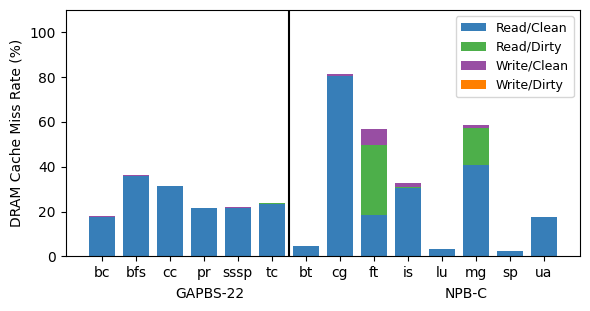

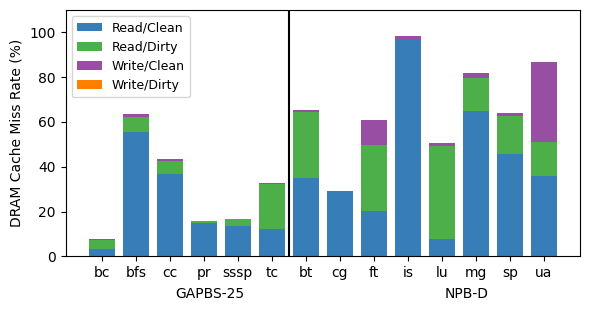

In [86]:
x1 = df_gap22_cas['app']
y1 = 100 * df_gap22_cas['numRdMissClean'].astype(float)/(df_gap22_cas['numTotMisses'].astype(float)+df_gap22_cas['numTotHits'].astype(float))
y2 = 100 * df_gap22_cas['numRdMissDirty'].astype(float)/(df_gap22_cas['numTotMisses'].astype(float)+df_gap22_cas['numTotHits'].astype(float))
y3 = 100 * df_gap22_cas['numWrMissClean'].astype(float)/(df_gap22_cas['numTotMisses'].astype(float)+df_gap22_cas['numTotHits'].astype(float))
y4 = 100 * df_gap22_cas['numWrMissDirty'].astype(float)/(df_gap22_cas['numTotMisses'].astype(float)+df_gap22_cas['numTotHits'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6,3)
plt.ylim([0,110])

for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Clean' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Read/Dirty' if i==0 else None)
    plt.bar(i*4, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3), label='Write/Clean' if i==0 else None)
    plt.bar(i*4, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4), label='Write/Dirty' if i==0 else None)

offset = (i+1)*4
x2 = df_npbC_cas['app']
y1 = 100 * df_npbC_cas['numRdMissClean'].astype(float)/(df_npbC_cas['numTotMisses'].astype(float)+df_npbC_cas['numTotHits'].astype(float))
y2 = 100 * df_npbC_cas['numRdMissDirty'].astype(float)/(df_npbC_cas['numTotMisses'].astype(float)+df_npbC_cas['numTotHits'].astype(float))
y3 = 100 * df_npbC_cas['numWrMissClean'].astype(float)/(df_npbC_cas['numTotMisses'].astype(float)+df_npbC_cas['numTotHits'].astype(float))
y4 = 100 * df_npbC_cas['numWrMissDirty'].astype(float)/(df_npbC_cas['numTotMisses'].astype(float)+df_npbC_cas['numTotHits'].astype(float))

for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))
    plt.bar(i*4+offset, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3))
    plt.bar(i*4+offset, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4))

plt.figtext(0.3, -0.01, "GAPBS-22")
plt.figtext(0.75, -0.01, "NPB-C")

plt.xticks(np.arange(14)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("DRAM Cache Miss Rate (%)", fontsize=10)
plt.legend(fontsize=9, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_mpki.pdf")

x1 = df_gap25_cas['app']
y1 = 100 * df_gap25_cas['numRdMissClean'].astype(float)/(df_gap25_cas['numTotMisses'].astype(float)+df_gap25_cas['numTotHits'].astype(float))
y2 = 100 * df_gap25_cas['numRdMissDirty'].astype(float)/(df_gap25_cas['numTotMisses'].astype(float)+df_gap25_cas['numTotHits'].astype(float))
y3 = 100 * df_gap25_cas['numWrMissClean'].astype(float)/(df_gap25_cas['numTotMisses'].astype(float)+df_gap25_cas['numTotHits'].astype(float))
y4 = 100 * df_gap25_cas['numWrMissDirty'].astype(float)/(df_gap25_cas['numTotMisses'].astype(float)+df_gap25_cas['numTotHits'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6,3)
plt.ylim([0,110])
for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Clean' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Read/Dirty' if i==0 else None)
    plt.bar(i*4, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3), label='Write/Clean' if i==0 else None)
    plt.bar(i*4, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4), label='Write/Dirty' if i==0 else None)

offset = (i+1)*4
x2 = df_npbD_cas['app']
y1 = 100 * df_npbD_cas['numRdMissClean'].astype(float)/(df_npbD_cas['numTotMisses'].astype(float)+df_npbD_cas['numTotHits'].astype(float))
y2 = 100 * df_npbD_cas['numRdMissDirty'].astype(float)/(df_npbD_cas['numTotMisses'].astype(float)+df_npbD_cas['numTotHits'].astype(float))
y3 = 100 * df_npbD_cas['numWrMissClean'].astype(float)/(df_npbD_cas['numTotMisses'].astype(float)+df_npbD_cas['numTotHits'].astype(float))
y4 = 100 * df_npbD_cas['numWrMissDirty'].astype(float)/(df_npbD_cas['numTotMisses'].astype(float)+df_npbD_cas['numTotHits'].astype(float))

for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))
    plt.bar(i*4+offset, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3))
    plt.bar(i*4+offset, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4))

plt.figtext(0.3, -0.01, "GAPBS-25")
plt.figtext(0.75, -0.01, "NPB-D")

plt.xticks(np.arange(14)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("DRAM Cache Miss Rate (%)", fontsize=10)
plt.legend(fontsize=9, ncol=1)
plt.tight_layout()

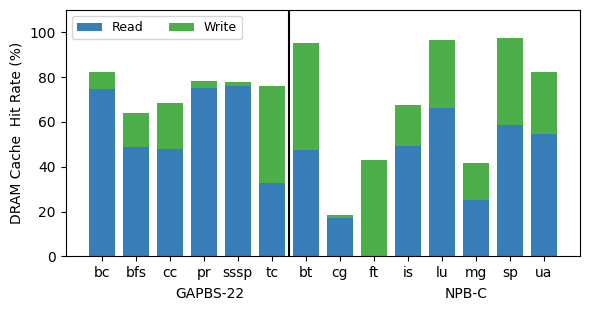

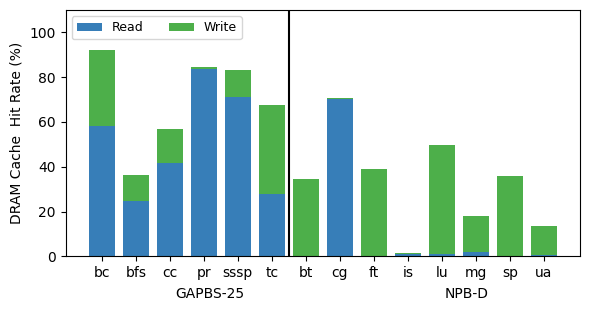

In [85]:
x1 = df_gap22_cas['app']
y1 = 100 * df_gap22_cas['numRdHit'].astype(float)/(df_gap22_cas['numTotMisses'].astype(float)+df_gap22_cas['numTotHits'].astype(float))
y2 = 100 * df_gap22_cas['numWrHit'].astype(float)/(df_gap22_cas['numTotMisses'].astype(float)+df_gap22_cas['numTotHits'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6,3)
plt.ylim([0,110])

for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Write' if i==0 else None)

offset = (i+1)*4
x2 = df_npbC_cas['app']
y1 = 100 * df_npbC_cas['numRdHit'].astype(float)/(df_npbC_cas['numTotMisses'].astype(float)+df_npbC_cas['numTotHits'].astype(float))
y2 = 100 * df_npbC_cas['numWrHit'].astype(float)/(df_npbC_cas['numTotMisses'].astype(float)+df_npbC_cas['numTotHits'].astype(float))

for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))

plt.figtext(0.3, -0.01, "GAPBS-22")
plt.figtext(0.75, -0.01, "NPB-C")

plt.xticks(np.arange(14)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("DRAM Cache  Hit Rate (%)", fontsize=10)
plt.legend(fontsize=9, ncol=2, loc='upper left')
plt.tight_layout()
#plt.savefig("../figures/cs1_all_mpki.pdf")

x1 = df_gap25_cas['app']
y1 = 100 * df_gap25_cas['numRdHit'].astype(float)/(df_gap25_cas['numTotMisses'].astype(float)+df_gap25_cas['numTotHits'].astype(float))
y2 = 100 * df_gap25_cas['numWrHit'].astype(float)/(df_gap25_cas['numTotMisses'].astype(float)+df_gap25_cas['numTotHits'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6,3)
plt.ylim([0,110])

for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Write' if i==0 else None)

offset = (i+1)*4
x2 = df_npbD_cas['app']
y1 = 100 * df_npbD_cas['numRdHit'].astype(float)/(df_npbD_cas['numTotMisses'].astype(float)+df_npbD_cas['numTotHits'].astype(float))
y2 = 100 * df_npbD_cas['numWrHit'].astype(float)/(df_npbD_cas['numTotMisses'].astype(float)+df_npbD_cas['numTotHits'].astype(float))

for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))

plt.figtext(0.3, -0.01, "GAPBS-25")
plt.figtext(0.75, -0.01, "NPB-D")

plt.xticks(np.arange(14)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("DRAM Cache  Hit Rate (%)", fontsize=10)
plt.legend(fontsize=9, ncol=2, loc='upper left')
plt.tight_layout()
#plt.savefig("../figures/cs1_all_mpki.pdf")


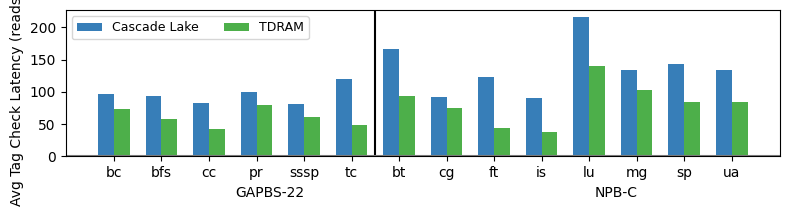

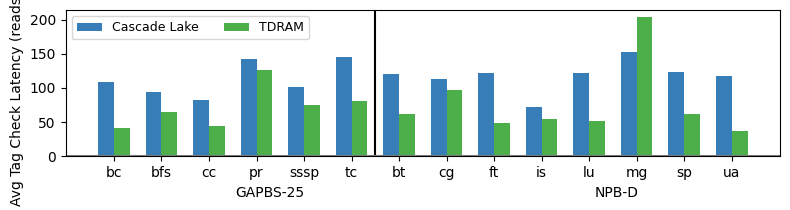

In [76]:
app_gap = df_gap22_cas['app']
gap_22_cas = df_gap22_cas['avgTimeTagCheckResRd'].astype(float)
gap_22_ram = df_gap22_ram['avgTimeTagCheckResRd'].astype(float)


gap_25_cas = df_gap25_cas['avgTimeTagCheckResRd'].astype(float)
gap_25_ram = df_gap25_ram['avgTimeTagCheckResRd'].astype(float)


app_npb = df_npbC_cas['app']
npb_C_cas = df_npbC_cas['avgTimeTagCheckResRd'].astype(float)
npb_C_ram = df_npbC_ram['avgTimeTagCheckResRd'].astype(float)

npb_D_cas = df_npbD_cas['avgTimeTagCheckResRd'].astype(float)
npb_D_ram = df_npbD_ram['avgTimeTagCheckResRd'].astype(float)


# Multi bar Chart1
fig = plt.figure()
fig.set_size_inches(8,2)

for i,app in enumerate(app_gap):
    plt.bar(i*3,   gap_22_cas[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)
    plt.bar(i*3+1, gap_22_ram[i],   width=1, color=cmap(2), label='TDRAM' if i==0 else None)

offset = i*3+2
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*3+1,   npb_C_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*3+2,   npb_C_ram[i],   width=1, color=cmap(2))

plt.figtext(0.3, -0.01, "GAPBS-22")
plt.figtext(0.75, -0.01, "NPB-C")

plt.xticks(np.arange(14)*3+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
plt.axhline(y=1, color='grey')

plt.ylabel("Avg Tag Check Latency (reads) (ns)")
plt.legend(fontsize=9, ncol=2, loc='upper left')
plt.tight_layout()

# Multi bar Chart2
fig = plt.figure()
fig.set_size_inches(8,2)

for i,app in enumerate(app_gap):
    plt.bar(i*3,   gap_25_cas[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)
    plt.bar(i*3+1, gap_25_ram[i],   width=1, color=cmap(2), label='TDRAM' if i==0 else None)

offset = i*3+2
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*3+1,   npb_D_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*3+2,   npb_D_ram[i],   width=1, color=cmap(2))

plt.figtext(0.3, -0.01, "GAPBS-25")
plt.figtext(0.75, -0.01, "NPB-D")

plt.xticks(np.arange(14)*3+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
plt.axhline(y=1, color='grey')

plt.ylabel("Avg Tag Check Latency (reads) (ns)")
plt.legend(fontsize=9, ncol=2)
plt.tight_layout()

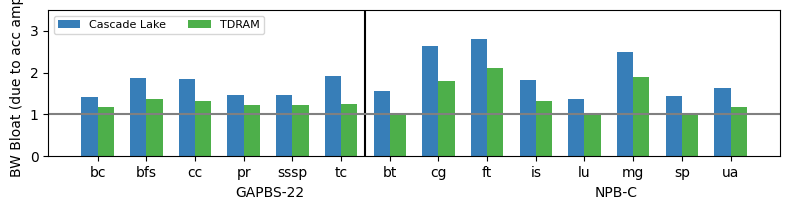

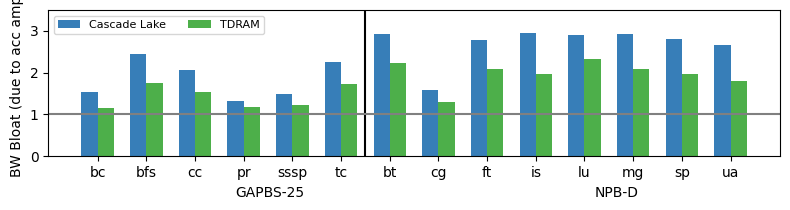

In [77]:
app_gap = df_gap22_cas['app']
gap_22_cas = df_gap22_cas['BWBloat'].astype(float)
gap_22_ram = df_gap22_ram['BWBloat'].astype(float)


gap_25_cas = df_gap25_cas['BWBloat'].astype(float)
gap_25_ram = df_gap25_ram['BWBloat'].astype(float)

app_npb = df_npbC_cas['app']
npb_C_cas = df_npbC_cas['BWBloat'].astype(float)
npb_C_ram = df_npbC_ram['BWBloat'].astype(float)

npb_D_cas = df_npbD_cas['BWBloat'].astype(float)
npb_D_ram = df_npbD_ram['BWBloat'].astype(float)


# Multi bar Chart1
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,3.5])

for i,app in enumerate(app_gap):
    plt.bar(i*3,   gap_22_cas[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)
    plt.bar(i*3+1, gap_22_ram[i],   width=1, color=cmap(2), label='TDRAM' if i==0 else None)

offset = i*3+2
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*3+1,   npb_C_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*3+2,   npb_C_ram[i],   width=1, color=cmap(2))

plt.figtext(0.3, -0.01, "GAPBS-22")
plt.figtext(0.75, -0.01, "NPB-C")

plt.xticks(np.arange(14)*3+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
plt.axhline(y=1, color='grey')

plt.ylabel("BW Bloat (due to acc amp)")
plt.legend(fontsize=8, ncol=2, loc='upper left')
plt.tight_layout()

# Multi bar Chart2
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,3.5])

for i,app in enumerate(app_gap):
    plt.bar(i*3,   gap_25_cas[i],   width=1, color=cmap(1), label='Cascade Lake' if i==0 else None)
    plt.bar(i*3+1, gap_25_ram[i],   width=1, color=cmap(2), label='TDRAM' if i==0 else None)

offset = i*3+2
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*3+1,   npb_D_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*3+2,   npb_D_ram[i],   width=1, color=cmap(2))

plt.figtext(0.3, -0.01, "GAPBS-25")
plt.figtext(0.75, -0.01, "NPB-D")

plt.xticks(np.arange(14)*3+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')
plt.axhline(y=1, color='grey')

plt.ylabel("BW Bloat (due to acc amp)")
plt.legend(fontsize=8, ncol=2, loc='upper left')
plt.tight_layout()